In [ ]:
import os, sys, time
import tifffile as tif
sys.path.append("/home/emilyjanedennis/Desktop/GitHub/rat_BrainPipe")
from tools.utils.io import makedir
from tools.registration.register import change_interpolation_order, transformix_command_line_call
from tools.registration.transform_list_of_points import modify_transform_files
from scipy.ndimage.interpolation import zoom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [ ]:
affinefile = "/home/emilyjanedennis/Desktop/mouseann_to_rat_AFFINE.tif"
mouseratfile="/home/emilyjanedennis/Desktop/mouseann_to_rat.tif"

In [ ]:
affine = tif.imread(affinefile)
mouserat = tif.imread(mouseratfile)

In [10]:
csvfilename="/home/emilyjanedennis/Desktop/ls_id_table_w_voxelcounts.csv"
anns=pd.read_csv(csvfilename,usecols=[1,2,3])

In [19]:
df=anns

In [20]:
df.insert(3,'affine_vox',0)
df.insert(4,'mouserat_vox',0)

In [22]:
df

,name,acronym,id,affine_vox,mouserat_vox
0,root,root,997,0,0
1,Basic cell groups and regions,grey,8,0,0
2,Cerebrum,CH,567,0,0
3,Cerebral cortex,CTX,688,0,0
4,Cortical plate,CTXpl,695,0,0
...,...,...,...,...,...
1325,parafloccular sulcus,pfs,65,0,0
1326,Interpeduncular fossa,IPF,624,0,0
1327,retina,retina,304325711,0,0
1328,"Primary somatosensory area, unassigned, layer ...",SSp-un1,182305696,0,0


In [23]:
for i in df['id']:
    df.mouserat_vox[i] = np.size(mouserat[mouserat==i])
    df.affine_vox[i] = np.size(affine[affine==i])

/home/emilyjanedennis/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/emilyjanedennis/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
#df.to_csv(r"/home/emilyjanedennis/Desktop/test.csv")

In [46]:
df['change'] = df['affine_vox']-df['mouserat_vox']

In [47]:
dfpercent = df['change']/df['mouserat_vox']*100
dfpercent[np.isinf(dfpercent)]=0
df['percent'] = dfpercent
dfpercent.replace(0,np.nan)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1325   NaN
1326   NaN
1327   NaN
1328   NaN
1329   NaN
Length: 1330, dtype: float64

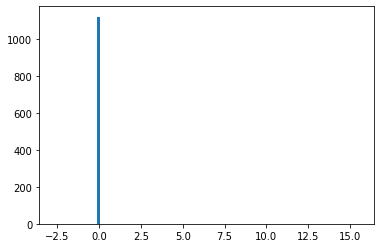

In [45]:
plt.hist(dfpercent,bins=100)
plt.show()

In [34]:
mp = np.nanmedian(df['percent'])
sp = np.nanstd(df['percent'])

/home/emilyjanedennis/anaconda3/envs/lightsheet/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [30]:
highmp = mp+2*sp

In [31]:
lowmp = mp-2*sp

In [32]:
twoxh = df[df['percent']> highmp]
twoxl = df[df['percent']< lowmp]
toox = df[df['percent'] > lowmp]
toox = toox[toox['percent']< highmp]

nan

In [ ]:
mouserat_relative = mouserat

In [ ]:
xm,ym,zm = np.shape(mouserat)


In [ ]:
for i in range(np.amax(toox['id']),np.amax(mouserat)):
    mouserat_relative[mouserat_relative==i]=0

In [ ]:
for i in toox['id']:
    mouserat_relative[mouserat_relative==i]=0

In [ ]:
txhp = twoxh['percent']
txlp = twoxl['percent']

In [ ]:

for i in twoxh['id']:
    mouserat_relative[mouserat_relative==i]=txhp[i]
    
for i in twoxl['id']:
    mouserat_relative[mouserat_relative==i]=txlp[i]

In [ ]:
tif.imsave("mouserat_relative.tif",mouserat_relative.astype("uint16"))

In [ ]:
np.amax(mouserat_relative)